In [57]:
import pandas as pd
from collections import Counter
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.model_selection import cross_val_score


In [1]:

field_prod_data_path = '../data/CNS_Field_Production.csv'
cns_gas_train_data_path = '../data/CNS_gas_train.csv'
cns_oil_data_path = '../data/CNS rock samples.csv'
cns_rock_samples_path = '../data/CNS rock samples.csv'
field_prod_data = pd.read_csv(field_prod_data_path)
field_prod_data

,X,Y,OBJECTID,FIELDNAME,FIELDAREA,ORGGRPNM,UNITNAME,UNITTYPCOD,UNITTYPDES,LOCATION,...,GCONDVOL,GCONDMBD,GCONDDEN,INJWATMASS,INJWATVOL,INJWATMBD,WATPRODMAS,WATPRODVOL,WATPRODMBD,WELLREGNO
0,1.114562,58.231419,3001,BALMORAL,CNS,PREMIER OIL PLC,BALMORAL,P,Oil Field Exporting to Pipeline,Offshore,...,NaN,NaN,NaN,0.0,0.0,0.0,48163.0,48163.0,9.772428,110/15a-L12
1,1.114562,58.231419,3002,BALMORAL,CNS,PREMIER OIL PLC,BALMORAL,P,Oil Field Exporting to Pipeline,Offshore,...,NaN,NaN,NaN,0.0,0.0,0.0,48163.0,48163.0,10.098176,110/15a-L12Z
2,1.114562,58.231419,3003,BALMORAL,CNS,PREMIER OIL PLC,BALMORAL,P,Oil Field Exporting to Pipeline,Offshore,...,NaN,NaN,NaN,0.0,0.0,0.0,46033.0,46033.0,9.340244,110/15-L10
3,1.114562,58.231419,3004,BALMORAL,CNS,PREMIER OIL PLC,BALMORAL,P,Oil Field Exporting to Pipeline,Offshore,...,NaN,NaN,NaN,0.0,0.0,0.0,4896.0,4896.0,1.026528,110/15-L10Y
4,1.114562,58.231419,3005,BALMORAL,CNS,PREMIER OIL PLC,BALMORAL,P,Oil Field Exporting to Pipeline,Offshore,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.000000,110/15-L10Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12246,2.686525,56.189296,12247,DUNCAN,CNS,ENQUEST PLC,DUNCAN,P,Oil Field Exporting to Pipeline,Offshore,...,NaN,NaN,NaN,0.0,0.0,0.0,25845.0,25845.0,5.418835,9/24b- 1
12247,2.686525,56.189296,12248,DUNCAN,CNS,ENQUEST PLC,DUNCAN,P,Oil Field Exporting to Pipeline,Offshore,...,NaN,NaN,NaN,0.0,0.0,0.0,27275.0,27275.0,5.534185,28/09a-C5
12248,2.686525,56.189296,12249,DUNCAN,CNS,ENQUEST PLC,DUNCAN,P,Oil Field Exporting to Pipeline,Offshore,...,NaN,NaN,NaN,0.0,0.0,0.0,27419.0,27419.0,5.748850,49/30a-A5Y
12249,2.686525,56.189296,12250,DUNCAN,CNS,ENQUEST PLC,DUNCAN,P,Oil Field Exporting to Pipeline,Offshore,...,NaN,NaN,NaN,0.0,0.0,0.0,2655.0,2655.0,0.538708,30/01c- 2A


In [2]:
field_prod_data.columns

Index(['X', 'Y', 'OBJECTID', 'FIELDNAME', 'FIELDAREA', 'ORGGRPNM', 'UNITNAME',
       'UNITTYPCOD', 'UNITTYPDES', 'LOCATION', 'PERIODDATE', 'PERIODYRMN',
       'PERIODMNTH', 'PERIODMNNM', 'PERIODYR', 'OILPRODMAS', 'OILPRODM3',
       'OILPRDDENS', 'OILPRODMBD', 'DGASPRODMA', 'DGASPROKSM', 'DGASPROMMS',
       'DGASPRODEN', 'AGASPRODMA', 'AGASPROMMS', 'AGASPROKSM', 'AGASPRODEN',
       'GCONDMASS', 'GCONDVOL', 'GCONDMBD', 'GCONDDEN', 'INJWATMASS',
       'INJWATVOL', 'INJWATMBD', 'WATPRODMAS', 'WATPRODVOL', 'WATPRODMBD',
       'WELLREGNO'],
      dtype='object')

In [3]:
cns_gas_train_data = pd.read_csv(cns_gas_train_data_path)
cns_gas_train_data



,Country,WELL_NAME,OGA Well Name,WH_SITETYPE,WH_FIELD,WH_BLOCK,WH_LAT,WH_LONG,WH_COORD_SYS,WH_OPERATOR,...,DD_G_H2,DN_G_N2,DD_G_GAS,DD_G_NC1,DD_G_NC2,DD_G_NC3,DD_G_IC4,DD_G_NC4,DD_G_IC5,DD_G_NC5
0,NaN,Well name,Well name,Site type,Field name,Block name,Latitude,Longitude,Location CRS,Operator,...,dDeuterium on H2,dN15 N2,dDeuterium total GAS,dDeuterium nC1,dDeuterium nC2,dDeuterium nC3,dDeuterium iC4,dDeuterium nC4,dDeuterium iC5,dDeuterium nC5
1,United Kingdom,023/22A-A12 (A12),23/22a-A12,WELL,PIERCE,023/22a,NaN,NaN,NaN,SHELL,...,NaN,-4,NaN,-187,NaN,NaN,NaN,NaN,NaN,NaN
2,United Kingdom,023/22A-A12 (A12),23/22a-A12,WELL,PIERCE,023/22a,NaN,NaN,NaN,SHELL,...,NaN,-3.7,NaN,-187,NaN,NaN,NaN,NaN,NaN,NaN
3,United Kingdom,023/22A-A12 (A12),23/22a-A12,WELL,PIERCE,023/22a,NaN,NaN,NaN,SHELL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,United Kingdom,023/22A-A12 (A12),23/22a-A12,WELL,PIERCE,023/22a,NaN,NaN,NaN,SHELL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1705,United Kingdom,014/26a-07A,14/26a- 7A,WELL,014/26a-06 (Atlantic),014/26a,58.03685295,World Geodetic System 1984,World Geodetic System 1984,ARCO,...,NaN,-5.9,NaN,-188,NaN,NaN,NaN,NaN,NaN,NaN
1706,United Kingdom,014/26a-07A,14/26a- 7A,WELL,014/26a-06 (Atlantic),014/26a,58.03685295,-0.891146243,World Geodetic System 1984,ARCO,...,NaN,-6,NaN,-190,NaN,NaN,NaN,NaN,NaN,NaN
1707,United Kingdom,014/26a-06,14/26a- 6,WELL,014/26a-06 (Atlantic),014/26a,58.01942425,-0.912446013,World Geodetic System 1984,ARCO,...,NaN,-6.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1708,United Kingdom,014/20b-18,14/20b- 18,WELL,Duart,014/20B (EXCL. TARTAN),58.36753631,-0.081898178,World Geodetic System 1984,TEXACO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
cns_gas_train_data.columns


Index(['Country', 'WELL_NAME', 'OGA Well Name', 'WH_SITETYPE', 'WH_FIELD',
       'WH_BLOCK', 'WH_LAT', 'WH_LONG', 'WH_COORD_SYS', 'WH_OPERATOR',
       'WH_SPUD_DATE', 'WH_SPUD_YEAR', 'WH_COMP_DATE', 'WH_TD_M',
       'WH_DR_ELEV_M', 'WH_DEPTH_REF', 'WH_WATER_DEPTH_M', 'SAMPLE_ID',
       'SH_DEPTH_TOP_FT', 'SH_DEPTH_BOT_FT', 'SH_SAMPLE_TYPE',
       'SH_SAMPLE_SUB_TYPE', 'SH_ORIG', 'SH_ORIG_DESC', 'SH_TREATMENT',
       'SH_TREATMENT_DESC', 'SH_LITH', 'SH_AGE', 'SH_AGE_BOT', 'SH_FORM',
       'SH_FORM_BOT', 'SH_CDATE', 'SH_COMMENT', 'SAMPLE_ID_GM',
       'SAMPLE_ID_GDB', 'SAMPLE_ID_SAM', 'EXT_SAMPLE_VENDOR', 'SAMPLE_ID_EXT',
       'GAS_METHOD', 'GAS_LAB', 'GAS_ACQ_DATE', 'GAS_TOTAL_CONCENTRATION',
       'GAS_AIR', 'GAS_C1', 'GAS_C2', 'C2_UNSAT', 'GAS_C3', 'C3_UNSAT',
       'GAS_IC4', 'GAS_NC4', 'C4_UNSAT', 'GAS_NEOC5', 'GAS_IC5', 'GAS_NC5',
       'C5_UNSAT', 'GAS_NC5_PLUS', 'GAS_C6PLUS', 'GAS_O2', 'GAS_CO2', 'GAS_H2',
       'GAS_H2S', 'GAS_HE', 'GAS_N2', 'D_G_METHOD', 'D_G_LAB'

In [5]:
cns_oil_data = pd.read_csv(cns_oil_data_path)
cns_oil_data


c:\users\z003nxun\appdata\local\continuum\miniconda3\envs\dewa36\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Country,WELL_NAME,OGA Well Name,WH_SITETYPE,WH_FIELD,WH_BLOCK,WH_LAT,WH_LONG,WH_COORD_SYS,WH_OPERATOR,...,VR_NR_OB,VR_MIN,VR_MAX,VR_MEAN,VR_ST,VR_QUAL,SULF_METHOD,SULF_LAB,SULF_ACQ_DATE,SUL
0,NaN,Well name,Well name,Site type,Field name,Block name name,Latitude,Longitude,Location CRS,Operator,...,Nr observations,Minimum value,Maximunm value,Mean value,Standard deviation,Quality,Method used,Laboratory,Acquisition date,Sulphur (wt%)
1,United Kingdom,014/19-27S1,14/19- 27Z,WELL,NaN,014/19,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,United Kingdom,014/19-27S1,14/19- 27Z,WELL,NaN,014/19,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,United Kingdom,014/19-27S1,14/19- 27Z,WELL,NaN,014/19,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,United Kingdom,014/19-27S1,14/19- 27Z,WELL,NaN,014/19,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
cns_rock_samples = pd.read_csv(cns_rock_samples_path)
cns_rock_samples

,Country,WELL_NAME,OGA Well Name,WH_SITETYPE,WH_FIELD,WH_BLOCK,WH_LAT,WH_LONG,WH_COORD_SYS,WH_OPERATOR,...,VR_NR_OB,VR_MIN,VR_MAX,VR_MEAN,VR_ST,VR_QUAL,SULF_METHOD,SULF_LAB,SULF_ACQ_DATE,SUL
0,NaN,Well name,Well name,Site type,Field name,Block name name,Latitude,Longitude,Location CRS,Operator,...,Nr observations,Minimum value,Maximunm value,Mean value,Standard deviation,Quality,Method used,Laboratory,Acquisition date,Sulphur (wt%)
1,United Kingdom,014/19-27S1,14/19- 27Z,WELL,NaN,014/19,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,United Kingdom,014/19-27S1,14/19- 27Z,WELL,NaN,014/19,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,United Kingdom,014/19-27S1,14/19- 27Z,WELL,NaN,014/19,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,United Kingdom,014/19-27S1,14/19- 27Z,WELL,NaN,014/19,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
cns_gas_train_data['GAS_C1'])

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [28]:
Counter(cns_gas_train_data['WH_COORD_SYS'].up)

Counter({'Location CRS': 1,
         nan: 384,
         'World Geodetic System 1984': 887,
         'WORLD GEODETIC SYSTEM 1984': 437,
         'ED50 / TM 0 N [1311_23090]': 1})

In [37]:
y_cols = ['GAS_C1', 'GAS_C2', 'GAS_C3', 'GAS_IC4', 'GAS_NC4', 'GAS_IC5', 'GAS_NC5']

In [38]:
coords = cns_gas_train_data[(cns_gas_train_data['WH_COORD_SYS'].str.upper() == 'WORLD GEODETIC SYSTEM 1984') ][['WH_LAT', 'WH_LONG']+y_cols]

In [39]:
def to_num(vals):
    return pd.to_numeric(vals, errors='coerce')

In [42]:
coords = coords.apply(to_num).dropna(subset=['WH_LAT', 'WH_LONG'])

In [43]:
coords

,WH_LAT,WH_LONG,GAS_C1,GAS_C2,GAS_C3,GAS_IC4,GAS_NC4,GAS_IC5,GAS_NC5
30,56.736665,2.306140,78.88,10.68,4.79,0.58,1.190,0.180,0.200
31,56.731516,2.324318,84.69,8.30,2.99,0.51,0.940,0.230,0.240
32,56.731516,2.324318,83.66,8.40,3.17,0.58,1.110,0.310,0.360
33,56.808485,2.074547,79.00,9.06,4.15,0.51,1.250,0.320,0.420
34,56.808485,2.074547,79.86,7.97,3.35,0.42,0.980,0.240,0.320
...,...,...,...,...,...,...,...,...,...
1704,58.063688,-0.820298,92.30,1.44,1.17,0.40,0.114,0.047,0.024
1706,58.036853,-0.891146,87.70,6.50,2.60,0.36,0.760,0.154,0.191
1707,58.019424,-0.912446,87.70,6.50,2.60,0.37,0.810,0.171,0.210
1708,58.367536,-0.081898,61.41,6.72,5.82,0.59,1.540,0.260,0.290


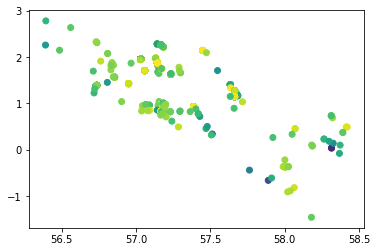

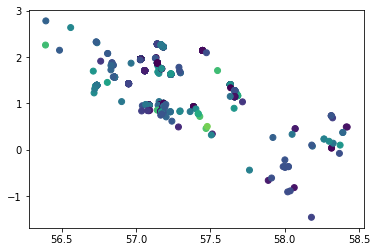

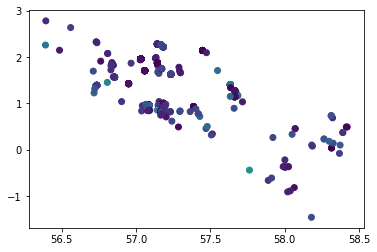

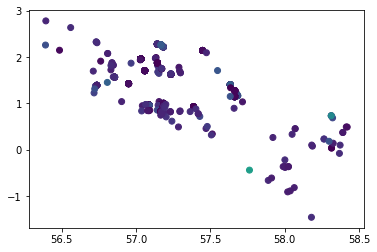

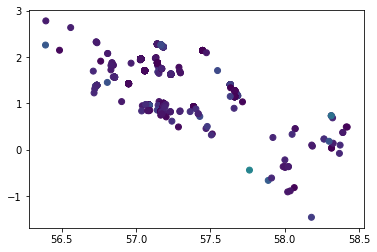

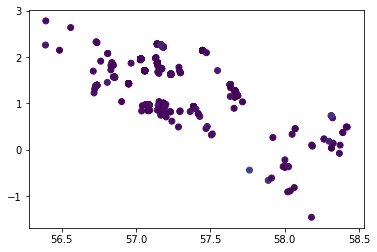

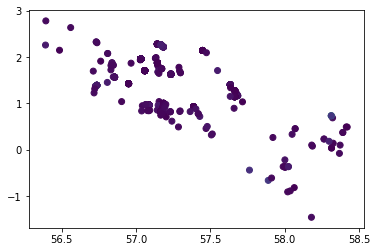

In [46]:
for pred_col in y_cols:
    plt.figure()
    plt.scatter(coords['WH_LAT'], coords['WH_LONG'], c=coords[pred_col])

In [54]:
X = coords[['WH_LAT', 'WH_LONG']]
y = coords[y_cols]

In [55]:
neigh = KNeighborsRegressor()
neigh.fit(X, y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [61]:
scores = cross_val_score(neigh, X, y['GAS_C1'], cv=5, scoring='r2')

In [62]:
scores

array([-0.93346996, -0.24781799, -4.30683728, -1.34461869, -0.10483257])

In [63]:
from sklearn.dummy import DummyRegressor

In [64]:
reg = DummyRegressor()

In [65]:
cross_val_score(reg, X, y['GAS_C1'], cv=5, scoring='r2')

array([-1.16116679e-02, -1.30073185e-01, -2.52068762e+00, -1.07227274e-03,
       -3.72865127e-02])